# Sentiment Analysis #


### Loading Data and Libraries ###

In [10]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
df = pd.read_csv('clean_tweets.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Tweet Id,Text,Username,cleaned_text,Date,year,month
0,0,0,6.822791e+17,@Daily_Star they better keep a close eye on th...,carisbrook5,better keep close eye kid commit suicide depre...,2015-12-30 19:16:32+00:00,2015,12
1,1,1,6.822476e+17,Calling customer service lines gives me #diarr...,ktandthekittens,calling customer service line give diarrhea tm...,2015-12-30 17:11:12+00:00,2015,12
2,2,2,6.822329e+17,5 Ways to Relieve Stress in 2016 https://t.co/...,ThriveStreams,way relieve stress via blog mentalhealth newye...,2015-12-30 16:13:04+00:00,2015,12
3,3,3,6.822210e+17,Sweet story. #anxiety #depression #coping #men...,ynniv129,sweet story anxiety depression coping mentalhe...,2015-12-30 15:25:33+00:00,2015,12
4,4,4,6.820633e+17,5 Different Types of Motivation https://t.co/x...,workttech,different type motivation motivation mentalhealth,2015-12-30 04:59:08+00:00,2015,12


### Adding Sentiment Scores ###

In [3]:
#TextBlob
# write functions to return polarity and subjectivity scores 
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
    
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [4]:
# create new columns with polarity and subjectivity scores
df['polarity'] = df['cleaned_text'].apply(get_polarity)
df['subjectivity'] = df['cleaned_text'].apply(get_subjectivity)

df.head()

,Unnamed: 0.1,Unnamed: 0,Tweet Id,Text,Username,cleaned_text,Date,year,month,polarity,subjectivity
0,0,0,6.822791e+17,@Daily_Star they better keep a close eye on th...,carisbrook5,better keep close eye kid commit suicide depre...,2015-12-30 19:16:32+00:00,2015,12,0.50,0.50
1,1,1,6.822476e+17,Calling customer service lines gives me #diarr...,ktandthekittens,calling customer service line give diarrhea tm...,2015-12-30 17:11:12+00:00,2015,12,0.00,0.00
2,2,2,6.822329e+17,5 Ways to Relieve Stress in 2016 https://t.co/...,ThriveStreams,way relieve stress via blog mentalhealth newye...,2015-12-30 16:13:04+00:00,2015,12,0.00,0.00
3,3,3,6.822210e+17,Sweet story. #anxiety #depression #coping #men...,ynniv129,sweet story anxiety depression coping mentalhe...,2015-12-30 15:25:33+00:00,2015,12,0.35,0.65
4,4,4,6.820633e+17,5 Different Types of Motivation https://t.co/x...,workttech,different type motivation motivation mentalhealth,2015-12-30 04:59:08+00:00,2015,12,0.00,0.60


In [5]:
# convert polarity scores
df['sent'] = np.where(
    df['polarity'] == 0, 'Neutral', np.where(
    df['polarity'] > 0, 'Positive', 'Negative'))

df.head()

,Unnamed: 0.1,Unnamed: 0,Tweet Id,Text,Username,cleaned_text,Date,year,month,polarity,subjectivity,sent
0,0,0,6.822791e+17,@Daily_Star they better keep a close eye on th...,carisbrook5,better keep close eye kid commit suicide depre...,2015-12-30 19:16:32+00:00,2015,12,0.50,0.50,Positive
1,1,1,6.822476e+17,Calling customer service lines gives me #diarr...,ktandthekittens,calling customer service line give diarrhea tm...,2015-12-30 17:11:12+00:00,2015,12,0.00,0.00,Neutral
2,2,2,6.822329e+17,5 Ways to Relieve Stress in 2016 https://t.co/...,ThriveStreams,way relieve stress via blog mentalhealth newye...,2015-12-30 16:13:04+00:00,2015,12,0.00,0.00,Neutral
3,3,3,6.822210e+17,Sweet story. #anxiety #depression #coping #men...,ynniv129,sweet story anxiety depression coping mentalhe...,2015-12-30 15:25:33+00:00,2015,12,0.35,0.65,Positive
4,4,4,6.820633e+17,5 Different Types of Motivation https://t.co/x...,workttech,different type motivation motivation mentalhealth,2015-12-30 04:59:08+00:00,2015,12,0.00,0.60,Neutral


In [6]:
# save to csv
df.to_csv('full_tweets.csv')

### Some Initial Analysis ###

In [7]:
# get averages
print('Avg Polarity: ', df['polarity'].mean())
print('Avg Subjectivity: ', df['subjectivity'].mean())

Avg Polarity:  0.12169236751541757
Avg Subjectivity:  0.39087816448028057


In [8]:
# get counts
print('TextBlob Sentiments: ', df['sent'].value_counts())

TextBlob Sentiments:  Positive    198164
Neutral     117932
Negative     70834
Name: sent, dtype: int64


In [9]:
means_yr = df.groupby('year')['polarity'].mean()
# get yearly averages
print('Avg Polarity: ', df.groupby('year')['polarity'].mean())
print('Avg Subjectivity: ', df.groupby('year')['subjectivity'].mean())

Avg Polarity:  year
2015    0.093896
2016    0.106182
2017    0.116091
2018    0.134755
2019    0.140929
2020    0.131029
2021    0.105172
Name: polarity, dtype: float64
Avg Subjectivity:  year
2015    0.309972
2016    0.334128
2017    0.351457
2018    0.410808
2019    0.410044
2020    0.407732
2021    0.452888
Name: subjectivity, dtype: float64


### Visualizations ###

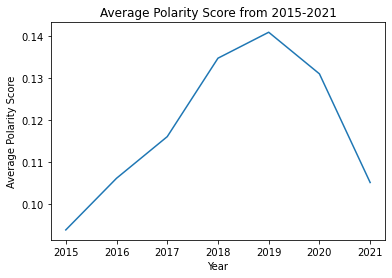

In [18]:
# plot average polarity for each year
avg_pol = df.groupby('year')['polarity'].agg('mean')
avg_pol.plot()
plt.title('Average Polarity Score from 2015-2021')
plt.xlabel('Year')
plt.ylabel('Average Polarity Score')
plt.savefig('average_polarity.png')
plt.show()

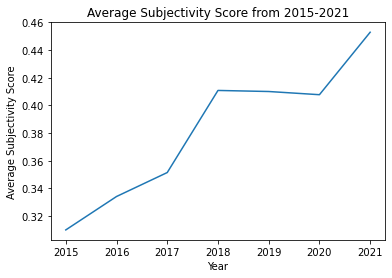

In [23]:
# plot average subjectivity for each year
avg_sub = df.groupby('year')['subjectivity'].agg('mean')
avg_sub.plot()
plt.title('Average Subjectivity Score from 2015-2021')
plt.xlabel('Year')
plt.ylabel('Average Subjectivity Score')
plt.savefig('average_subjectivitypng')
plt.show()

In [24]:
df.groupby('year')['sent'].value_counts()

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = [12, 30, 1, 8, 22]
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='Positive')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='Neutral')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='Negative')
 
# Adding Xticks
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Sentiment Count', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019', '2020', '2021'])
 
plt.legend()
plt.show()


year  sent    
2015  Neutral     17184
      Positive    13966
      Negative     5635
2016  Neutral     18373
      Positive    18125
      Negative     6717
2017  Positive    20513
      Neutral     17747
      Negative     7384
2018  Positive    37353
      Neutral     17769
      Negative    12685
2019  Positive    38141
      Neutral     16717
      Negative    12320
2020  Positive    40466
      Neutral     17840
      Negative    13510
2021  Positive    29600
      Negative    12583
      Neutral     12302
Name: sent, dtype: int64